<a href="https://colab.research.google.com/github/akhilesh-madireddy/FML/blob/main/multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import Ridge as rid
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse,r2_score as r2

In [ ]:
data = pd.read_csv('/content/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data['State']=data['State'].replace('New York',0)
data['State']=data['State'].replace('California',1)
data['State']=data['State'].replace('Florida',3)

In [ ]:
print(data)

    R&D Spend  Administration  Marketing Spend  State     Profit
0   165349.20       136897.80        471784.10      0  192261.83
1   162597.70       151377.59        443898.53      1  191792.06
2   153441.51       101145.55        407934.54      3  191050.39
3   144372.41       118671.85        383199.62      0  182901.99
4   142107.34        91391.77        366168.42      3  166187.94
5   131876.90        99814.71        362861.36      0  156991.12
6   134615.46       147198.87        127716.82      1  156122.51
7   130298.13       145530.06        323876.68      3  155752.60
8   120542.52       148718.95        311613.29      0  152211.77
9   123334.88       108679.17        304981.62      1  149759.96
10  101913.08       110594.11        229160.95      3  146121.95
11  100671.96        91790.61        249744.55      1  144259.40
12   93863.75       127320.38        249839.44      3  141585.52
13   91992.39       135495.07        252664.93      1  134307.35
14  119943.24       15654

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int64  
 4   Profit           50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.00000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.30000,112012.639200
std,45902.256482,28017.802755,122290.310726,1.24949,40306.180338
min,0.000000,51283.140000,0.000000,0.00000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.00000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.00000,107978.190000
75%,101602.800000,144842.180000,299469.085000,3.00000,139765.977500
max,165349.200000,182645.560000,471784.100000,3.00000,192261.830000


In [ ]:
data.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.064770,0.972900
Administration,0.241955,1.000000,-0.032154,0.005944,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.168032,0.747766
State,0.064770,0.005944,0.168032,1.000000,0.075664
Profit,0.972900,0.200717,0.747766,0.075664,1.000000


<Axes: >

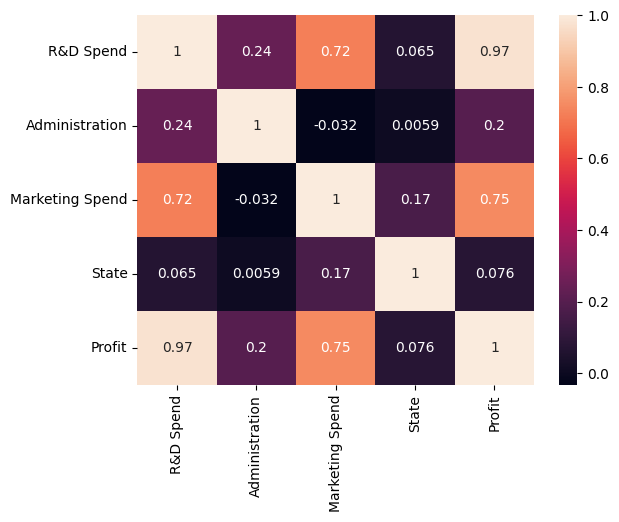

In [ ]:
sns.heatmap(data.corr(),annot = True)

In [ ]:
mlr =rid(alpha=20)

In [ ]:


X_train, X_test, y_train, y_test = tts(data[['R&D Spend', 'Marketing Spend', 'Administration']], data['Profit'], test_size = 0.3, random_state = 42)


In [ ]:
mlr.fit(X_train, y_train)

Ridge(alpha=20)

In [ ]:
y_train_pred = mlr.predict(X_train)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

In [ ]:
print("Training Accuracies : ")
print("Mean Absolute Error : ", mae(y_train_pred, y_train))
print("Mean Squared Error : ", mse(y_train_pred, y_train))
print("Root Mean Squared Error : ", mse(y_train_pred, y_train)**0.5)
print("R2 Score : ", r2(y_train_pred, y_train))

Training Accuracies : 
Mean Absolute Error :  6618.070692025486
Mean Squared Error :  82041812.21257144
Root Mean Squared Error :  9057.69353713027
R2 Score :  0.9483157741767326


In [ ]:
y_test_pred = mlr.predict(X_test)

In [ ]:
print("Testing Accuracies : ")
print("Mean Absolute Error : ", mae(y_test_pred, y_test))
print("Mean Squared Error : ", mse(y_test_pred, y_test))
print("Root Mean Squared Error : ", mse(y_test_pred, y_test)**0.5)
print("R2 Score : ", r2(y_test_pred, y_test))

Testing Accuracies : 
Mean Absolute Error :  7222.594346339129
Mean Squared Error :  81772149.43247539
Root Mean Squared Error :  9042.795443471858
R2 Score :  0.9355141378860753


<Axes: ylabel='Profit'>

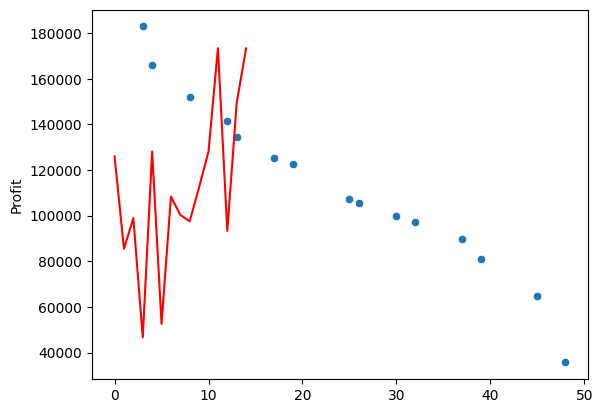

In [ ]:
sns.scatterplot(y_test)
sns.lineplot(y_test_pred, color = 'r')